In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

# the commands below didn't work inside for loop and got CUDA out of memory Error.
#     with torch.no_grad():
#        torch.cuda.empty_cache()
#    del data, model, trainer, acc, f1
# Instead of running these commands in a loop, execute them cell by cell, restarting between them.
# Each cell will print its results. To keep the results and avoid re-running specific cells, skip them intermittently on each run.

In [3]:
results = {'acc':[],
           'f1':[],
           'a':[]}

In [4]:
lr = 5.0e-5
g = 4
lora_alpha = 8
r = 8
lora_dropout = 0.0
wd = 0.0


print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}. Lora alpha: {lora_alpha}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=lora_alpha,
                            dropout=lora_dropout)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['a'].append(lora_alpha)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 5e-05. Focal loss gamma: 4. Weight decay 0.0. Lora rank: 8. Lora alpha: 8


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	6.2753	Val Loss:	2.1829	Accuracy:	0.0651	F1:	0.0545
2 / 30: Train Loss:	6.0948	Val Loss:	2.1559	Accuracy:	0.1302	F1:	0.1128
3 / 30: Train Loss:	5.5481	Val Loss:	1.9328	Accuracy:	0.3136	F1:	0.2885
4 / 30: Train Loss:	3.7322	Val Loss:	1.4366	Accuracy:	0.5237	F1:	0.4914
5 / 30: Train Loss:	2.5118	Val Loss:	1.2883	Accuracy:	0.5562	F1:	0.5053
6 / 30: Train Loss:	1.8468	Val Loss:	1.1537	Accuracy:	0.6331	F1:	0.5829
7 / 30: Train Loss:	1.4485	Val Loss:	1.0604	Accuracy:	0.6686	F1:	0.6151
8 / 30: Train Loss:	1.2160	Val Loss:	1.0216	Accuracy:	0.6746	F1:	0.6313
9 / 30: Train Loss:	1.0145	Val Loss:	0.9674	Accuracy:	0.7012	F1:	0.6589
10 / 30: Train Loss:	0.9176	Val Loss:	0.9331	Accuracy:	0.7041	F1:	0.6638
11 / 30: Train Loss:	0.7561	Val Loss:	0.8899	Accuracy:	0.7189	F1:	0.6797
12 / 30: Train Loss:	0.7130	Val Loss:	0.8737	Accuracy:	0.7337	F1:	0.6969
13 / 30: Train Loss:	0.6163	Val Loss:	0.8636	Accuracy:	0.7396	F1:	0.7063
14 / 30: Train Loss:	0.6007	Val Loss:	0.8524	Accuracy:	0.745

In [4]:
lr = 5.0e-5
g = 4
lora_alpha = 16
r = 16
lora_dropout = 0.0
wd = 0.0


print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}. Lora alpha: {lora_alpha}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=lora_alpha,
                            dropout=lora_dropout)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['a'].append(lora_alpha)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 5e-05. Focal loss gamma: 4. Weight decay 0.0. Lora rank: 16. Lora alpha: 16


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	6.2720	Val Loss:	2.1827	Accuracy:	0.0651	F1:	0.0538
2 / 30: Train Loss:	6.0568	Val Loss:	2.1234	Accuracy:	0.1627	F1:	0.1448
3 / 30: Train Loss:	4.5952	Val Loss:	1.5660	Accuracy:	0.4675	F1:	0.4376
4 / 30: Train Loss:	2.7063	Val Loss:	1.2798	Accuracy:	0.6154	F1:	0.5747
5 / 30: Train Loss:	1.8653	Val Loss:	1.1259	Accuracy:	0.6479	F1:	0.5903
6 / 30: Train Loss:	1.4143	Val Loss:	1.0789	Accuracy:	0.6716	F1:	0.6311
7 / 30: Train Loss:	1.1470	Val Loss:	0.9986	Accuracy:	0.6893	F1:	0.6487
8 / 30: Train Loss:	0.9778	Val Loss:	0.9679	Accuracy:	0.7041	F1:	0.6675
9 / 30: Train Loss:	0.8190	Val Loss:	0.9281	Accuracy:	0.7071	F1:	0.6677
10 / 30: Train Loss:	0.6873	Val Loss:	0.8951	Accuracy:	0.7249	F1:	0.6928
11 / 30: Train Loss:	0.5844	Val Loss:	0.8582	Accuracy:	0.7337	F1:	0.6981
12 / 30: Train Loss:	0.5634	Val Loss:	0.8651	Accuracy:	0.7249	F1:	0.6963
13 / 30: Train Loss:	0.4792	Val Loss:	0.8537	Accuracy:	0.7544	F1:	0.7320
14 / 30: Train Loss:	0.4594	Val Loss:	0.8350	Accuracy:	0.745

In [5]:
from collections import defaultdict 

a = {'acc': [0.7724867724867724], 'f1': [0.7378798278260866], 'a': [8]}
b = {'acc': [0.7354497354497355], 'f1': [0.693470253756707], 'a': [16]}

results = defaultdict(list)
for d in (a,b):
    for k,v in d.items():
        results[k].append(v[0])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

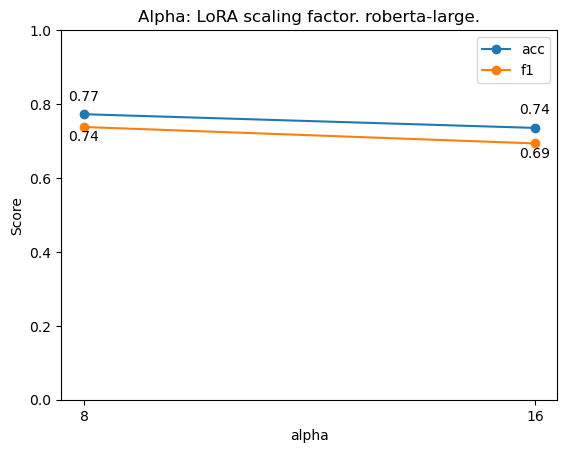

In [7]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='a', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["a"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["a"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['a'], [val for val in df['a']], ha='center')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('alpha')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Alpha: LoRA scaling factor. {model_checkpoint}.')